<a href="https://colab.research.google.com/github/srikarthickeyanganapathy/mnist-classification/blob/main/DLEX03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : SRI KARTHICKEYAN GANAPATHY\
REG. NO : 212222240102

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Name : SRI KARTHICKEYAN GANAPATHY
Reg : 212222240102


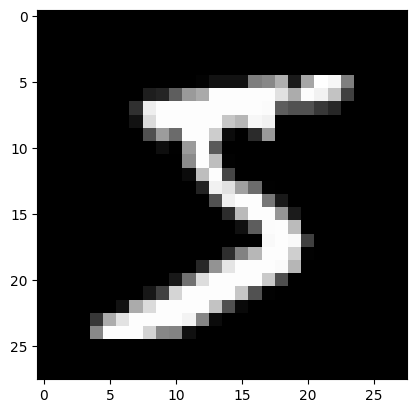

In [11]:
X_train.shape
X_test.shape
single_image= X_train[0]
single_image.shape
plt.imshow(single_image,cmap='gray')
y_train.shape
X_train.min()
X_train.max()
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
print("Name : SRI KARTHICKEYAN GANAPATHY")
print("Reg : 212222240102")

Name : SRI KARTHICKEYAN GANAPATHY
Reg : 212222240102


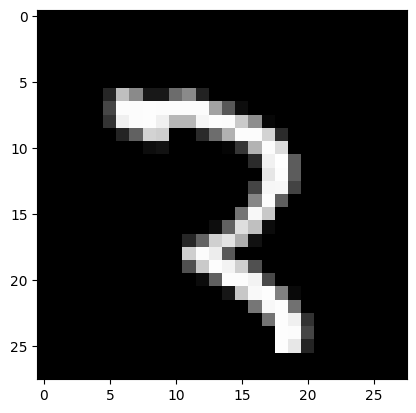

In [12]:
X_train_scaled.min()
X_train_scaled.max()
y_train[0]
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)
type(y_train_onehot)
y_train_onehot.shape
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')
y_train_onehot[500]
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)
print("Name : SRI KARTHICKEYAN GANAPATHY")
print("Reg : 212222240102")

In [13]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                173088    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 173738 (678.66 KB)
Trainable params: 173738 (678.66 KB)
Non-trainable params: 0 (0.00 Byte)
______________

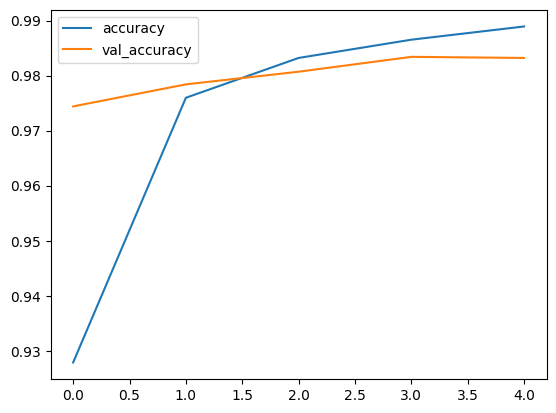

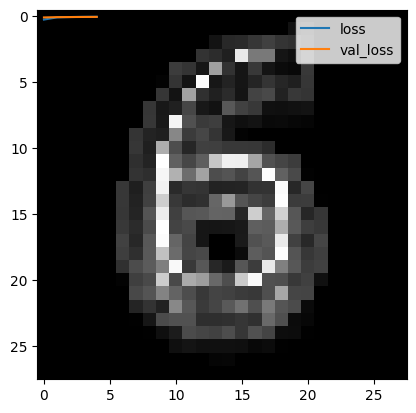

In [14]:
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))
metrics = pd.DataFrame(model.history.history)
metrics.head()
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))
img = image.load_img('/content/6.jpg')
type(img)
img = image.load_img('/content/6.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)
print("Name : SRI KARTHICKEYAN GANAPATHY")
print("Reg : 212222240102")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [15]:
img1 = image.load_img('/content/6.jpg')
img_tensor1 = tf.convert_to_tensor(np.asarray(img1))
img_28_gray1 = tf.image.resize(img_tensor1,(28,28))
img_28_gray1 = tf.image.rgb_to_grayscale(img_28_gray1)
img_28_gray_inverted1 = 255.0-img_28_gray1
img_28_gray_inverted_scaled1 = img_28_gray_inverted1.numpy()/255.0

In [16]:
x_single_prediction1 = np.argmax(
    model.predict(img_28_gray_inverted_scaled1.reshape(1,28,28,1)),
     axis=1)
print("Name : SRI KARTHICKEYAN GANAPATHY")
print("Reg : 212222240102")
print(x_single_prediction1)

1/1 [==============================] - 0s 21ms/step
Name : SRI KARTHICKEYAN GANAPATHY
Reg : 212222240102
[6]
